# Load packages

In [1]:
import numpy
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn.metrics import RocCurveDisplay
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Loding Model

In [2]:
import pickle
filename_LR = "final_model_LR.sav"

filename_SVM = "final_model_SVM.sav"

filename_KNN = "final_model_KNN.sav"

filename_BAY = "final_model_BAY.sav"

filename_DT = "final_model_DT.sav"

filename_RF = "final_model_RF.sav"

filename_GB = "final_model_GB.sav"

filenam_LGB = "final_model_LGB.sav"

filename_XGB = "final_model_XGB.sav"

filename_CAT = "final_model_CAT.sav"

filename_AB = "final_model_AB.sav"

filename_EX = "final_model_EX.sav"


In [3]:
model_lr= pickle.load(open(filename_LR,'rb'))
model_svm= pickle.load(open(filename_SVM,'rb'))
model_knn= pickle.load(open(filename_KNN,'rb'))
model_bay= pickle.load(open(filename_BAY,'rb'))
model_dt= pickle.load(open(filename_DT,'rb'))
model_rf= pickle.load(open(filename_RF,'rb'))
model_gb= pickle.load(open(filename_GB,'rb'))
model_lgb= pickle.load(open(filenam_LGB,'rb'))
model_xgb= pickle.load(open(filename_XGB,'rb'))
model_cat= pickle.load(open(filename_CAT,'rb'))
model_ab= pickle.load(open(filename_AB,'rb'))
model_ex= pickle.load(open(filename_EX,'rb'))

# Extenal Validation

In [4]:
ex_val=pd.read_excel(r"Datasets.xlsx",sheet_name="Three_other_centers")

In [5]:
features_exval=ex_val.iloc[:,2:-1]
target_exval=ex_val.iloc[:,-1]

In [7]:
features_exval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   563 non-null    float64
 1   BMI                   551 non-null    float64
 2   temp                  563 non-null    float64
 3   HR                    563 non-null    int64  
 4   SD                    563 non-null    int64  
 5   WBC                   559 non-null    float64
 6   Hgb                   559 non-null    float64
 7   PLT                   559 non-null    float64
 8   ALT                   555 non-null    float64
 9   AST                   551 non-null    float64
 10  ALP                   476 non-null    float64
 11  TBil                  539 non-null    float64
 12  SCr                   561 non-null    float64
 13  BUN                   554 non-null    float64
 14  ALB                   542 non-null    float64
 15  gender                5

In [8]:

numerical_cols = ex_val.iloc[:,2:17].columns.to_list()

categorical_cols =ex_val.iloc[:,17:-1].columns.to_list()

my_cols =  numerical_cols + categorical_cols

features_exval= features_exval[my_cols].copy()

In [12]:
scaler = StandardScaler().fit(features_trainval)
rescaledValidationX = scaler.transform(features_exval)

# Result

## AUC-ROC

In [13]:
plt.title("ROC  curve in ExValiation Dataset")

RocCurveDisplay.from_estimator(model_lr, rescaledValidationX, target_exval,ax=plt.gca())
RocCurveDisplay.from_estimator(model_svm, rescaledValidationX, target_exval,ax=plt.gca())
RocCurveDisplay.from_estimator(model_knn, rescaledValidationX, target_exval,ax=plt.gca())
RocCurveDisplay.from_estimator(model_dt, rescaledValidationX, target_exval,ax=plt.gca())
RocCurveDisplay.from_estimator(model_rf, rescaledValidationX, target_exval,ax=plt.gca())
RocCurveDisplay.from_estimator(model_bay, rescaledValidationX, target_exval,ax=plt.gca())
RocCurveDisplay.from_estimator(model_gb, rescaledValidationX, target_exval,ax=plt.gca())
RocCurveDisplay.from_estimator(model_xgb, rescaledValidationX, target_exval,ax=plt.gca())
RocCurveDisplay.from_estimator(model_lgb, rescaledValidationX, target_exval,ax=plt.gca())
RocCurveDisplay.from_estimator(model_cat, rescaledValidationX, target_exval,ax=plt.gca())
RocCurveDisplay.from_estimator(model_ab, rescaledValidationX, target_exval,ax=plt.gca())
RocCurveDisplay.from_estimator(model_ex, rescaledValidationX, target_exval,ax=plt.gca())

plt.legend()

plt.rcParams['figure.figsize'] = (8, 6)

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')


plt.show()

## PR-AUC

In [14]:
from sklearn.metrics import (precision_recall_curve,PrecisionRecallDisplay)
plt.title("Precision_Recall curve in ExValidation Dataset")


PrecisionRecallDisplay.from_estimator(model_lr, rescaledValidationX, target_exval,ax=plt.gca())
PrecisionRecallDisplay.from_estimator(model_svm, rescaledValidationX, target_exval,ax=plt.gca())
PrecisionRecallDisplay.from_estimator(model_knn, rescaledValidationX, target_exval,ax=plt.gca())
PrecisionRecallDisplay.from_estimator(model_dt, rescaledValidationX, target_exval,ax=plt.gca())
PrecisionRecallDisplay.from_estimator(model_rf, rescaledValidationX, target_exval,ax=plt.gca())
PrecisionRecallDisplay.from_estimator(model_bay, rescaledValidationX, target_exval,ax=plt.gca())

PrecisionRecallDisplay.from_estimator(model_gb, rescaledValidationX, target_exval,ax=plt.gca())
PrecisionRecallDisplay.from_estimator(model_xgb, rescaledValidationX, target_exval,ax=plt.gca())
PrecisionRecallDisplay.from_estimator(model_lgb, rescaledValidationX, target_exval,ax=plt.gca())
PrecisionRecallDisplay.from_estimator(model_cat, rescaledValidationX, target_exval,ax=plt.gca())
PrecisionRecallDisplay.from_estimator(model_ab, rescaledValidationX, target_exval,ax=plt.gca())
PrecisionRecallDisplay.from_estimator(model_ex, rescaledValidationX, target_exval,ax=plt.gca())



plt.legend()

plt.rcParams['figure.figsize'] = (8, 6)

plt.xlabel('Recall')
plt.ylabel('Precision') 
plt.legend()

plt.show()



## calibration curve

In [15]:

from sklearn.calibration import CalibrationDisplay

plt.title("Calibaration curve in Testing Dataset")


CalibrationDisplay.from_estimator(model_lr, rescaledValidationX, target_exval,ax=plt.gca())
CalibrationDisplay.from_estimator(model_svm, rescaledValidationX, target_exval,ax=plt.gca())
CalibrationDisplay.from_estimator(model_knn, rescaledValidationX, target_exval,ax=plt.gca())
CalibrationDisplay.from_estimator(model_dt, rescaledValidationX, target_exval,ax=plt.gca())
CalibrationDisplay.from_estimator(model_rf, rescaledValidationX, target_exval,ax=plt.gca())
CalibrationDisplay.from_estimator(model_bay, rescaledValidationX, target_exval,ax=plt.gca())

CalibrationDisplay.from_estimator(model_gb, rescaledValidationX, target_exval,ax=plt.gca())
CalibrationDisplay.from_estimator(model_xgb, rescaledValidationX, target_exval,ax=plt.gca())
CalibrationDisplay.from_estimator(model_lgb, rescaledValidationX, target_exval,ax=plt.gca())
CalibrationDisplay.from_estimator(model_cat, rescaledValidationX, target_exval,ax=plt.gca())
CalibrationDisplay.from_estimator(model_ab, rescaledValidationX, target_exval,ax=plt.gca())
CalibrationDisplay.from_estimator(model_ex, rescaledValidationX, target_exval,ax=plt.gca())


plt.legend()

plt.rcParams['figure.figsize'] = (12, 10)
 
plt.legend()
plt.show()


## SHAP

In [51]:
import shap
import catboost as cb

In [108]:
model_cat_ex = cb.CatBoostClassifier(max_depth=8, iterations=500,learning_rate=0.01,verbose=False)
model_cat_ex.fit(features_trainval, target_trainval)

In [109]:
explainer = shap.TreeExplainer(model_cat_ex) 


In [110]:
shap_values = explainer.shap_values(features_exval)

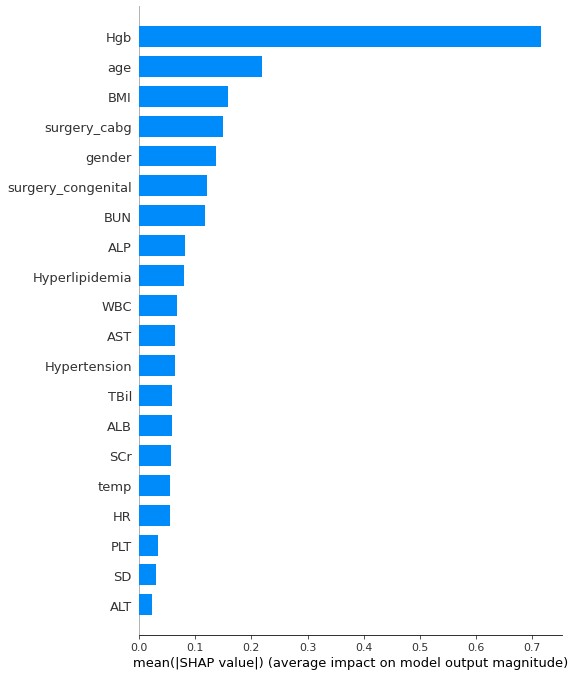

In [111]:
shap.summary_plot(shap_values, features_exval, plot_type="bar",show=False)

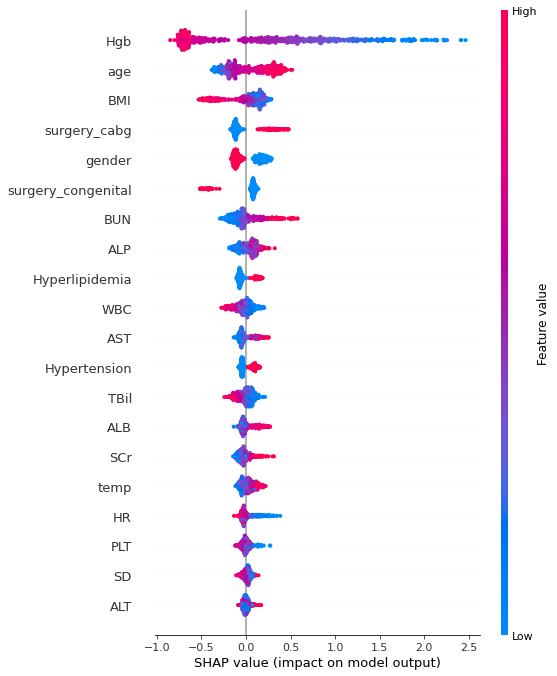

In [112]:
shap.summary_plot(shap_values, features_exval.iloc[:,:])

## Other Evaluation Index

In [113]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB


clf_list = [
    (model_lr, "Logistic Regression"),
    (model_svm, "Support Vector Machine"),
    (model_knn, "KNeighborsClassifierbor"),
    (model_dt,"DecisionTreeClassifier"),
    (model_rf, "RandomForestClassifier"),
    (model_bay, "GaussianNB"),
    (model_gb, "GradientBoostingClassifier"),
    (model_xgb, "XGBClassifier"),
    (model_lgb, "LGBMClassifier"),
    (model_cat, "CatboostClassifier"),
    (model_ab, "AdaBoostClassifier"),
    (model_ex, "ExtraTreesClassifier")
]

In [114]:
from collections import defaultdict

import pandas as pd

from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    brier_score_loss,
    log_loss,
    roc_auc_score,
    accuracy_score
)

scores = defaultdict(list)
for i, (clf, name) in enumerate(clf_list):
#     clf.fit(rescaledtrainX, target_trainval)
    y_prob = clf.predict_proba(rescaledValidationX)
    y_pred = clf.predict(rescaledValidationX)
#     y_pred_LR = model_LR.predict_proba(features_test)[:, 1].ravel()
    
    scores["Classifier"].append(name)

    for metric in [roc_auc_score,brier_score_loss, log_loss]:
        score_name = metric.__name__.replace("_", " ").replace("score", "").capitalize()
        scores[score_name].append(metric(target_exval, y_prob[:, 1]))

    for metric in [accuracy_score,precision_score, recall_score, f1_score]:
        score_name = metric.__name__.replace("_", " ").replace("score", "").capitalize()
        scores[score_name].append(metric(target_exval, y_pred))

    score_df_nofs_exval = pd.DataFrame(scores).set_index("Classifier")
    score_df_nofs_exval.round(decimals=3)


Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


In [16]:
# score_df_nofs_exval

# MIMIC-IV Validation

In [116]:
miv = pd.read_excel(r'MIMIC-IV.xlsx',sheet_name="age<70")

In [117]:
miv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4438 entries, 0 to 4437
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4438 non-null   int64  
 1   age                   4438 non-null   float64
 2   BMI                   4104 non-null   float64
 3   temp                  4377 non-null   float64
 4   HR                    4435 non-null   float64
 5   SD                    4433 non-null   float64
 6   WBC                   4269 non-null   float64
 7   Hgb                   4227 non-null   float64
 8   PLT                   4268 non-null   float64
 9   ALT                   4045 non-null   float64
 10  AST                   4093 non-null   float64
 11  ALP                   4072 non-null   float64
 12  TBil                  3976 non-null   float64
 13  SCr                   3612 non-null   float64
 14  BUN                   4272 non-null   float64
 15  ALB                  

In [118]:
features_miv=miv.iloc[:,1:-1]
target_miv=miv.iloc[:,-1]

## Statistic Processing

In [119]:

numerical_cols = miv.iloc[:,1:16].columns.to_list()

categorical_cols =miv.iloc[:,16:-1].columns.to_list()


my_cols =  numerical_cols + categorical_cols

features_miv= features_miv[my_cols].copy()



In [120]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

numerical_transformer = SimpleImputer(strategy='mean')

categorical_transformer = SimpleImputer(strategy='most_frequent')


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


steps = []

steps.append(('preprocessor', preprocessor))

my_pipeline = Pipeline(steps = steps)


my_pipeline.fit(features_miv)

    
features_t = my_pipeline.transform(features_miv)

features_trans=pd.DataFrame(features_t,columns=my_cols)



In [71]:
numerical_cols

['age',
 'BMI',
 'temp',
 'HR',
 'SD',
 'WBC',
 'Hgb',
 'PLT',
 'ALT',
 'AST',
 'ALP',
 'TBil',
 'SCr',
 'BUN',
 'ALB']

In [744]:
categorical_cols

['gender',
 'previous mi',
 'history_ph',
 'stroke+stenosis',
 'COPD',
 'CKD',
 'Hyperlipidemia',
 'Infective myocardial',
 'surgery_cabg',
 'surgery_valvular',
 'surgery_congenital']

In [121]:
features_miv=features_trans


In [122]:
features_miv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4438 entries, 0 to 4437
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   4438 non-null   float64
 1   BMI                   4438 non-null   float64
 2   temp                  4438 non-null   float64
 3   HR                    4438 non-null   float64
 4   SD                    4438 non-null   float64
 5   WBC                   4438 non-null   float64
 6   Hgb                   4438 non-null   float64
 7   PLT                   4438 non-null   float64
 8   ALT                   4438 non-null   float64
 9   AST                   4438 non-null   float64
 10  ALP                   4438 non-null   float64
 11  TBil                  4438 non-null   float64
 12  SCr                   4438 non-null   float64
 13  BUN                   4438 non-null   float64
 14  ALB                   4438 non-null   float64
 15  gender               

In [123]:
scaler = StandardScaler().fit(features_trainval)

rescaledMivX = scaler.transform(features_miv)

In [124]:
rescaledMivX

array([[ 0.40480951,  4.52121489,  3.07273897, ..., -1.3184578 ,
         1.54421999, -0.41205403],
       [-0.18880767,  2.36679479,  5.24877146, ..., -1.3184578 ,
         1.54421999, -0.41205403],
       [ 0.31518376,  0.92225488,  0.03379703, ...,  0.75846189,
        -0.64757613, -0.41205403],
       ...,
       [ 0.89633679,  1.51559057,  0.22138604, ...,  0.75846189,
        -0.64757613, -0.41205403],
       [ 0.08726666,  2.67831518,  0.85918867, ...,  0.75846189,
        -0.64757613, -0.41205403],
       [ 1.13394436,  1.63539417, -0.19130978, ...,  0.75846189,
        -0.64757613, -0.41205403]])

## AUC-ROC

In [17]:
plt.title("ROC curve in MIMIC-IV Dataset(age≤70)")

RocCurveDisplay.from_estimator(model_lr, rescaledMivX, target_miv,ax=plt.gca())
RocCurveDisplay.from_estimator(model_svm, rescaledMivX, target_miv,ax=plt.gca())
RocCurveDisplay.from_estimator(model_knn, rescaledMivX, target_miv,ax=plt.gca())
RocCurveDisplay.from_estimator(model_dt, rescaledMivX, target_miv,ax=plt.gca())
RocCurveDisplay.from_estimator(model_rf, rescaledMivX, target_miv,ax=plt.gca())
RocCurveDisplay.from_estimator(model_bay, rescaledMivX, target_miv,ax=plt.gca())
RocCurveDisplay.from_estimator(model_gb, rescaledMivX, target_miv,ax=plt.gca())
RocCurveDisplay.from_estimator(model_xgb, rescaledMivX, target_miv,ax=plt.gca())
RocCurveDisplay.from_estimator(model_lgb, rescaledMivX, target_miv,ax=plt.gca())
RocCurveDisplay.from_estimator(model_cat, rescaledMivX, target_miv,ax=plt.gca())
RocCurveDisplay.from_estimator(model_ab, rescaledMivX, target_miv,ax=plt.gca())
RocCurveDisplay.from_estimator(model_ex, rescaledMivX, target_miv,ax=plt.gca())

plt.legend()

plt.rcParams['figure.figsize'] = (8, 6)

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')


plt.show()

## PR-AUC

In [18]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

plt.title("Precision_Recall curve in MIMIC-IV Dataset(age≤70)")


PrecisionRecallDisplay.from_estimator(model_lr, rescaledMivX, target_miv,ax=plt.gca())
PrecisionRecallDisplay.from_estimator(model_svm, rescaledMivX, target_miv,ax=plt.gca())
PrecisionRecallDisplay.from_estimator(model_knn, rescaledMivX, target_miv,ax=plt.gca())
PrecisionRecallDisplay.from_estimator(model_dt, rescaledMivX, target_miv,ax=plt.gca())
PrecisionRecallDisplay.from_estimator(model_rf, rescaledMivX, target_miv,ax=plt.gca())
PrecisionRecallDisplay.from_estimator(model_bay, rescaledMivX, target_miv,ax=plt.gca())

PrecisionRecallDisplay.from_estimator(model_gb, rescaledMivX, target_miv,ax=plt.gca())
PrecisionRecallDisplay.from_estimator(model_xgb, rescaledMivX, target_miv,ax=plt.gca())
PrecisionRecallDisplay.from_estimator(model_lgb, rescaledMivX, target_miv,ax=plt.gca())
PrecisionRecallDisplay.from_estimator(model_cat, rescaledMivX, target_miv,ax=plt.gca())
PrecisionRecallDisplay.from_estimator(model_ab, rescaledMivX, target_miv,ax=plt.gca())
PrecisionRecallDisplay.from_estimator(model_ex, rescaledMivX, target_miv,ax=plt.gca())



plt.legend()

plt.rcParams['figure.figsize'] = (12, 10)


plt.xlabel('Recall')
plt.ylabel('Precision') 
plt.legend()

plt.show()


## Calibration curve

In [19]:

from sklearn.calibration import CalibrationDisplay

plt.title("Calibaration curve in  MIMIC-IV Dataset(age≤70)")


CalibrationDisplay.from_estimator(model_lr, rescaledMivX, target_miv,ax=plt.gca())
CalibrationDisplay.from_estimator(model_svm, rescaledMivX, target_miv,ax=plt.gca())
CalibrationDisplay.from_estimator(model_knn, rescaledMivX, target_miv,ax=plt.gca())
CalibrationDisplay.from_estimator(model_dt, rescaledMivX, target_miv,ax=plt.gca())
CalibrationDisplay.from_estimator(model_rf, rescaledMivX, target_miv,ax=plt.gca())
CalibrationDisplay.from_estimator(model_bay, rescaledMivX, target_miv,ax=plt.gca())

CalibrationDisplay.from_estimator(model_gb, rescaledMivX, target_miv,ax=plt.gca())
CalibrationDisplay.from_estimator(model_xgb, rescaledMivX, target_miv,ax=plt.gca())
CalibrationDisplay.from_estimator(model_lgb, rescaledMivX, target_miv,ax=plt.gca())
CalibrationDisplay.from_estimator(model_cat, rescaledMivX, target_miv,ax=plt.gca())
CalibrationDisplay.from_estimator(model_ab, rescaledMivX, target_miv,ax=plt.gca())
CalibrationDisplay.from_estimator(model_ex, rescaledMivX, target_miv,ax=plt.gca())


plt.legend()

plt.rcParams['figure.figsize'] = (10, 8)
 
plt.legend()
plt.show()


## Other Evaluation Index

In [128]:
from collections import defaultdict

import pandas as pd

from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    brier_score_loss,
    log_loss,
    roc_auc_score,
    accuracy_score
)

scores = defaultdict(list)
for i, (clf, name) in enumerate(clf_list):
#     clf.fit(rescaledtrainX, target_trainval)
    y_prob = clf.predict_proba(rescaledMivX)
    y_pred = clf.predict(rescaledMivX)
#     y_pred_LR = model_LR.predict_proba(features_test)[:, 1].ravel()
    
    scores["Classifier"].append(name)

    for metric in [roc_auc_score,brier_score_loss, log_loss]:
        score_name = metric.__name__.replace("_", " ").replace("score", "").capitalize()
        scores[score_name].append(metric(target_miv, y_prob[:, 1]))

    for metric in [accuracy_score,precision_score, recall_score, f1_score]:
        score_name = metric.__name__.replace("_", " ").replace("score", "").capitalize()
        scores[score_name].append(metric(target_miv, y_pred))

    score_miv= pd.DataFrame(scores).set_index("Classifier")
    score_miv.round(decimals=3)


Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


In [20]:
# score_miv

## SHAP

In [130]:
shap_values = explainer.shap_values(features_miv)

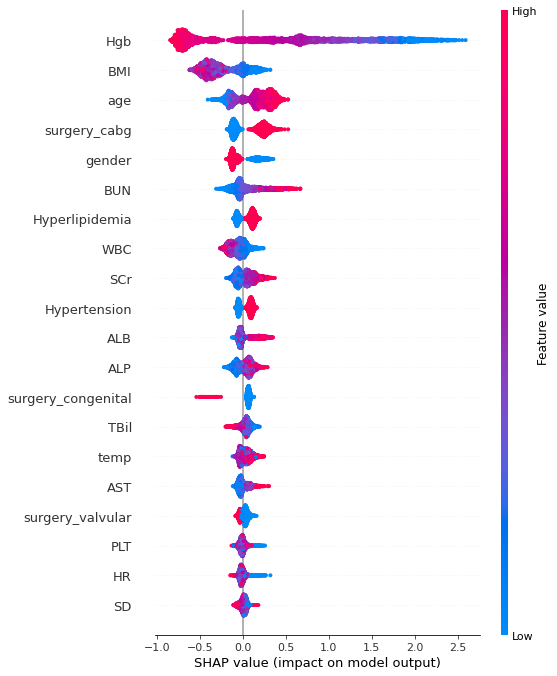

In [131]:
shap.summary_plot(shap_values, features_miv.iloc[:,:])

## The code for MIMIC-IV dataset age>70 are the same as above

# Decision Curve

In [132]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


def calculate_net_benefit_model(thresh_group, y_pred_score, y_label):
    net_benefit_model = np.array([])
    for thresh in thresh_group:
        y_pred_label = y_pred_score > thresh
        tn, fp, fn, tp = confusion_matrix(y_label, y_pred_label).ravel()
        n = len(y_label)
        net_benefit = (tp / n) - (fp / n) * (thresh / (1 - thresh))
        net_benefit_model = np.append(net_benefit_model, net_benefit)
    return net_benefit_model


def calculate_net_benefit_all(thresh_group, y_label):
    net_benefit_all = np.array([])
    tn, fp, fn, tp = confusion_matrix(y_label, y_label).ravel()
    total = tp + tn
    for thresh in thresh_group:
        net_benefit = (tp / total) - (tn / total) * (thresh / (1 - thresh))
        net_benefit_all = np.append(net_benefit_all, net_benefit)
    return net_benefit_all


In [133]:
predictions_lrmiv=model_lr.predict_proba(rescaledValidationX)[:,1]
predictions_rfmiv=model_rf.predict_proba(rescaledValidationX)[:,1]
predictions_catmiv=model_cat.predict_proba(rescaledValidationX)[:,1]

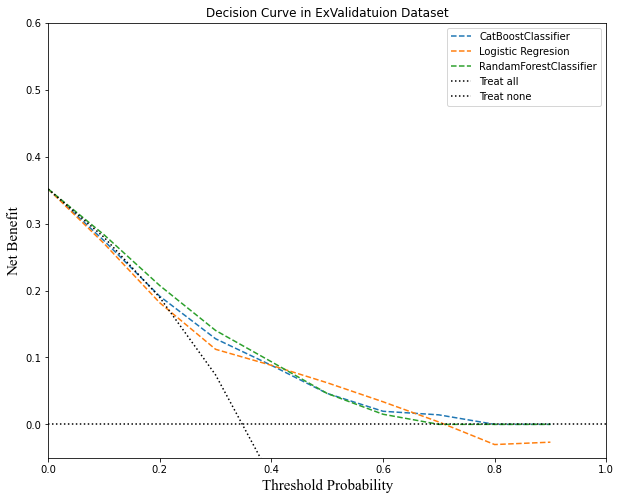

In [135]:
y_label = np.array(target_exval)

thresh_group = np.arange(0,1,0.1)

net_benefit_all = calculate_net_benefit_all(thresh_group, y_label)


net_benefit_model_lrmiv = calculate_net_benefit_model(thresh_group, predictions_lrmiv, y_label)
net_benefit_model_rfmiv = calculate_net_benefit_model(thresh_group, predictions_rfmiv, y_label)
net_benefit_model_catmiv = calculate_net_benefit_model(thresh_group, predictions_catmiv, y_label)


plt.figure(figsize=(10,8))

plt.plot(thresh_group,net_benefit_model_catmiv,label="CatBoostClassifier",linestyle = '--')
plt.plot(thresh_group,net_benefit_model_lrmiv,label="Logistic Regresion",linestyle = '--') 
plt.plot(thresh_group,net_benefit_model_rfmiv,label="RandamForestClassifier",linestyle = '--') 


plt.plot(thresh_group,net_benefit_all,label="Treat all", color = 'black', linestyle = ':')
plt.plot((0, 1), (0, 0), color = 'black', linestyle = ':', label = 'Treat none')


plt.title("Decision Curve in ExValidatuion Dataset")

plt.xlabel(
        xlabel = 'Threshold Probability', 
        fontdict= {'family': 'Times New Roman', 'fontsize': 15}
        )
plt.ylabel(
        ylabel = 'Net Benefit', 
        fontdict= {'family': 'Times New Roman', 'fontsize': 15}
        )


plt.xlim((0,1.0))
plt.ylim((-0.05,0.6))
plt.legend()
plt.show()

## The code for MIMIC-IV dataset age>70 are the same as above